Scatter plot


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.The relationship between working experience and salary?


In [2]:
experience = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 2, 3, 3, 3, 2, 4, 5, 5, 2]
salary     = [5000, 7000, 8000, 10000, 15000, 18000, 19000, 20000, 16000, 300000, 12000, 6000, 8000, 5500, 9000, 7800, 9200, 14000, 16000, 8000]

list_of_tuples = list(zip(experience, salary))
df = pd.DataFrame(list_of_tuples, columns=['experience', 'salary'])
df

,experience,salary
0,1,5000
1,2,7000
2,3,8000
3,4,10000
4,5,15000
5,6,18000
6,7,19000
7,8,20000
8,9,16000
9,10,300000


In [3]:
df.describe()

,experience,salary
count,20.000000,20.000000
mean,4.300000,25675.000000
std,2.556725,64741.029657
min,1.000000,5000.000000
25%,2.000000,7950.000000
50%,3.500000,9600.000000
75%,5.250000,16000.000000
max,10.000000,300000.000000


In [4]:
df.corr()

,experience,salary
experience,1.000000,0.577699
salary,0.577699,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

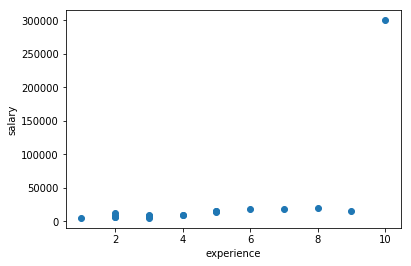

In [5]:
plt.scatter(df.experience, df.salary)
plt.xlabel("experience")
plt.ylabel("salary")
plt.show

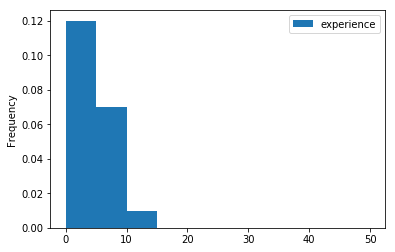

In [6]:
df.plot(kind="hist", y="experience", bins=10, range = (0, 50), density = True)

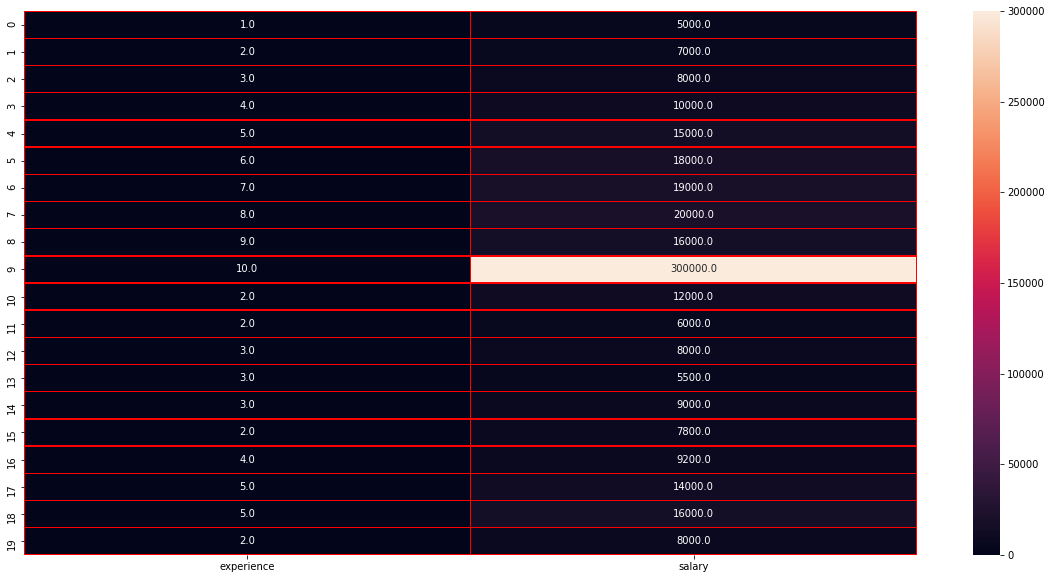

In [7]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df, annot=True, linewidths=0.5, linecolor="red", fmt=".1f", ax=ax)
plt.show()

1.Covariance(linear association):
$Cov(X,Y)=\sum_{i=1}^{n}(X_i-\overline X)(Y_i-\overline Y)/(n-1)$

2.Because covariance ranges from negative infinity to positive infinity, we usually use Correlation instead of Covariance, which ranged from -1 to 1:
$r= \frac {𝐶𝑜𝑣(𝑋,𝑌)}{S_x S_y}$

3.Variance: $Variance(X, X)=\sum_{i=1}^{n}(X_i-\overline X)(X_i-\overline X)/(n-1)$

In [8]:
# First, Let's calculate the mean!
def calculate_mean(a_list_of_values):
    mean = sum(a_list_of_values) / float(len(a_list_of_values))
    return mean

In [9]:
# Then, Let's calculate the variance!
def calculate_variance(a_list_of_values, mean):
    variance_sum = sum((x-mean)**2 for x in a_list_of_values)
    variance = variance_sum / (len(a_list_of_values) - 1)
    return variance

In [10]:
mean_experience = calculate_mean(experience)
print(mean_experience)
variance_experience = calculate_variance(experience, mean_experience)
print(variance_experience)

4.3
6.536842105263156


In [11]:
mean_salary = calculate_mean(salary)
print(mean_salary)
variance_salary = calculate_variance(salary, mean_salary)
print(variance_salary)

25675.0
4191400921.0526314


In [12]:
# And then we calculate the Covariance

def calculate_covariance(a_list_of_Xs, the_mean_of_Xs, a_list_of_Ys, the_mean_of_Ys):
    cov_sum = 0
    for i in range(len(a_list_of_Xs)):
        cov_sum += (a_list_of_Xs[i] - the_mean_of_Xs)*(a_list_of_Ys[i] - the_mean_of_Ys)
    the_covariance = cov_sum / (len(a_list_of_Xs) - 1)
    return the_covariance

In [13]:
df.cov()

,experience,salary
experience,6.536842,9.562368e+04
salary,95623.684211,4.191401e+09


In [14]:
covariance_of_experience_and_salary = calculate_covariance(experience, mean_experience, salary, mean_salary)
print(covariance_of_experience_and_salary)

95623.68421052632


In [15]:
# Let's calculate standard deviation!

def calculate_the_stadard_deviation(a_list_of_values):
    the_mean_of_the_list_values = sum(a_list_of_values) / float(len(a_list_of_values))
    variance = sum([(a_list_of_values[i] - the_mean_of_the_list_values) ** 2 for i in range(len(a_list_of_values))]) / float(len(a_list_of_values) - 1)
    return variance ** 0.5

In [16]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
calculate_the_stadard_deviation(a)

3.0276503540974917

In [17]:
import pandas as pd
b = np.array(a)
b.std()

2.8722813232690143

In [18]:
# Let's calculate the correlation!

def calculate_the_correlation(a_list_of_Xs, the_mean_of_Xs, a_list_of_Ys, the_mean_of_Ys):
    X_std = calculate_the_stadard_deviation(a_list_of_Xs)
    Y_std = calculate_the_stadard_deviation(a_list_of_Ys)
    X_Y_Cov = calculate_covariance(a_list_of_Xs, the_mean_of_Xs, a_list_of_Ys, the_mean_of_Ys)
    
    Corr = X_Y_Cov / (X_std * Y_std)
    return Corr

In [19]:
calculate_the_correlation(experience, mean_experience, salary, mean_salary)

0.5776993416092882

In [20]:
df.corr()

,experience,salary
experience,1.000000,0.577699
salary,0.577699,1.000000


Make Prediction:Use one variable to make prediction about another

dependent variable:Y

independent variable:X

William Inc  index

Oridinary Least Square(OLS)

$b1 = \frac{Cov(X, Y)}{Variance(X, X)}=\frac{\sum_{i=1}^{n}(X_i-\overline X)(Y_i-\overline Y)}{\sum_{i=1}^{n}(X_i-\overline X)(X_i-\overline X)}$
$b0 = \overline Y - b1 \overline X$

In [21]:
def calculate_the_coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = calculate_mean(x), calculate_mean(y)
    b1 = calculate_covariance(x, x_mean, y, y_mean) / calculate_variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    
    return [b0, b1]

In [22]:
list_of_tuples

[(1, 5000),
 (2, 7000),
 (3, 8000),
 (4, 10000),
 (5, 15000),
 (6, 18000),
 (7, 19000),
 (8, 20000),
 (9, 16000),
 (10, 300000),
 (2, 12000),
 (2, 6000),
 (3, 8000),
 (3, 5500),
 (3, 9000),
 (2, 7800),
 (4, 9200),
 (5, 14000),
 (5, 16000),
 (2, 8000)]

In [23]:
list_of_lists = [list(elem) for elem in list_of_tuples]
list_of_lists

[[1, 5000],
 [2, 7000],
 [3, 8000],
 [4, 10000],
 [5, 15000],
 [6, 18000],
 [7, 19000],
 [8, 20000],
 [9, 16000],
 [10, 300000],
 [2, 12000],
 [2, 6000],
 [3, 8000],
 [3, 5500],
 [3, 9000],
 [2, 7800],
 [4, 9200],
 [5, 14000],
 [5, 16000],
 [2, 8000]]

In [24]:
b0, b1 = calculate_the_coefficients(list_of_lists)
b0

-37227.21417069245

In [25]:
def simple_linear_regression(training_data, testing_data):
    predictions = []
    b0, b1 = calculate_the_coefficients(training_data)
    for row in testing_data:
        y = b0 + b1 * row[0]
        predictions.append(y)
    return predictions

In [26]:
from math import sqrt
def  calculate_the_RMSE(predicted_data, actual_data):
    the_sum_of_error = 0
    for i in range(len(actual_data)):
        prediction_error = predicted_data[i] - actual_data[i]
        the_sum_of_error += prediction_error ** 2
    RMSE = sqrt(the_sum_of_error / float(len(actual_data)))
    return RMSE

In [27]:
data_to_be_put_into_the_model = []
for row in list_of_lists:
    row_copy = list(row)
    row_copy[-1] = None
    data_to_be_put_into_the_model.append(row_copy)
data_to_be_put_into_the_model

[[1, None],
 [2, None],
 [3, None],
 [4, None],
 [5, None],
 [6, None],
 [7, None],
 [8, None],
 [9, None],
 [10, None],
 [2, None],
 [2, None],
 [3, None],
 [3, None],
 [3, None],
 [2, None],
 [4, None],
 [5, None],
 [5, None],
 [2, None]]

In [28]:
predictions = simple_linear_regression(list_of_lists, data_to_be_put_into_the_model)
predictions

[-22598.792270531416,
 -7970.3703703703795,
 6658.05152979066,
 21286.473429951693,
 35914.895330112726,
 50543.31723027377,
 65171.739130434806,
 79800.16103059583,
 94428.58293075688,
 109057.0048309179,
 -7970.3703703703795,
 -7970.3703703703795,
 6658.05152979066,
 6658.05152979066,
 6658.05152979066,
 -7970.3703703703795,
 21286.473429951693,
 35914.895330112726,
 35914.895330112726,
 -7970.3703703703795]

In [29]:
actual_data = [row[-1] for row in list_of_lists]
actual_data

[5000,
 7000,
 8000,
 10000,
 15000,
 18000,
 19000,
 20000,
 16000,
 300000,
 12000,
 6000,
 8000,
 5500,
 9000,
 7800,
 9200,
 14000,
 16000,
 8000]

In [33]:
def how_good_is_our_model(dataset, some_model_to_be_evaluated):
    test_data = []
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_data.append(row_copy)
    predict_data = some_model_to_be_evaluated(dataset, test_data)
    print(predict_data)
    actual_data = [row[-1] for row in dataset]
    print(actual_data)
    RMSE = calculate_the_RMSE(predict_data, actual_data)
    return RMSE

In [34]:
result = how_good_is_our_model(list_of_lists, simple_linear_regression)
print(result)

[-22598.792270531416, -7970.3703703703795, 6658.05152979066, 21286.473429951693, 35914.895330112726, 50543.31723027377, 65171.739130434806, 79800.16103059583, 94428.58293075688, 109057.0048309179, -7970.3703703703795, -7970.3703703703795, 6658.05152979066, 6658.05152979066, 6658.05152979066, -7970.3703703703795, 21286.473429951693, 35914.895330112726, 35914.895330112726, -7970.3703703703795]
[5000, 7000, 8000, 10000, 15000, 18000, 19000, 20000, 16000, 300000, 12000, 6000, 8000, 5500, 9000, 7800, 9200, 14000, 16000, 8000]
51506.78070443368


In [ ]:
ANOVA(Analysis of Variance) Table